In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import visuals as vs
from IPython.display import display

np.random.seed = 42

data = pd.read_csv('clusters.csv', dtype={'with_postgresql_version': str})
print("The dataset has {} data points with {} variables each.".format(*data.shape))
print("Column names: {}".format(list(data)))

data.head()

The dataset has 1095 data points with 32 variables each.
Column names: ['cluster_name', 'attempts', 'start_ts', 'end_ts', 'failed', 'completed', 'vm_count', 'build_name', 'with_conda', 'with_conda_version', 'with_docker', 'with_docker_version', 'with_flavor', 'with_foundation', 'with_foundation_version', 'with_gemfire', 'with_gemfire_version', 'with_image', 'with_java_version', 'with_kubernetes', 'with_kubernetes_version', 'with_memcached', 'with_memcached_version', 'with_oracle', 'with_oracle_version', 'with_os_version', 'with_postgresql', 'with_postgresql_version', 'with_tibco', 'with_tibco_version', 'with_ulticom', 'with_ulticom_version']


,cluster_name,attempts,start_ts,end_ts,failed,completed,vm_count,build_name,with_conda,with_conda_version,...,with_memcached_version,with_oracle,with_oracle_version,with_os_version,with_postgresql,with_postgresql_version,with_tibco,with_tibco_version,with_ulticom,with_ulticom_version
0,kalexey.20181227174135,1,1545922452338,1545923103007,False,True,13,20181227_174049_Proj_2127259257,False,4.5.11,...,_default_,False,11.2.0,rhel7.3,False,9.5,False,8.4.5,False,_default_
1,sdmitry.20181128184423,1,1543421316335,1543421667461,False,True,1,20181128_183651_Proj_1735463230,False,4.5.11,...,_default_,True,11.2.0,rhel7.4,False,9.5,False,8.4.5,False,_default_
2,igarus.20181221190350,2,1545408262310,1545409537436,False,True,14,20181220_115814_Proj_2696985,False,4.5.11,...,_default_,False,11.2.0,rhel7.4,False,9.5,False,8.4.5,True,9s65
3,sdmitry.20181211190002,1,1544544132560,1544544935177,False,True,9,20181211_161447_Proj_2631643,False,4.5.11,...,_default_,True,11.2.0,rhel7.4,False,9.5,False,8.4.5,False,_default_
4,abondar.20181207141530,1,1544181372440,1544181831985,False,True,4,20181207_083303_Proj_1027219150,False,4.5.11,...,_default_,True,11.2.0,rhel7.3,False,9.5,False,8.4.5,False,_default_


TODO: describe each column

In [2]:
data['seconds'] = (data.end_ts - data.start_ts)/1000
data = data.drop(columns=['end_ts', 'start_ts'])

In [3]:
display(data.describe())

,attempts,vm_count,seconds
count,1095.000000,1095.000000,1095.000000
mean,1.296804,5.042009,593.556932
std,1.198162,5.017708,372.183086
min,1.000000,1.000000,50.761000
25%,1.000000,1.000000,353.266000
50%,1.000000,3.000000,499.470000
75%,1.000000,9.000000,729.423000
max,10.000000,26.000000,4539.504000


In [4]:
uniques = data.apply(lambda x: x.nunique())
display(uniques)


cluster_name               1095
attempts                     10
failed                        2
completed                     2
vm_count                     21
build_name                  488
with_conda                    1
with_conda_version            1
with_docker                   2
with_docker_version           1
with_flavor                   1
with_foundation               2
with_foundation_version       1
with_gemfire                  2
with_gemfire_version          5
with_image                    1
with_java_version             5
with_kubernetes               2
with_kubernetes_version       1
with_memcached                1
with_memcached_version        2
with_oracle                   2
with_oracle_version           1
with_os_version               3
with_postgresql               1
with_postgresql_version       1
with_tibco                    2
with_tibco_version            1
with_ulticom                  2
with_ulticom_version          3
seconds                    1093
dtype: i

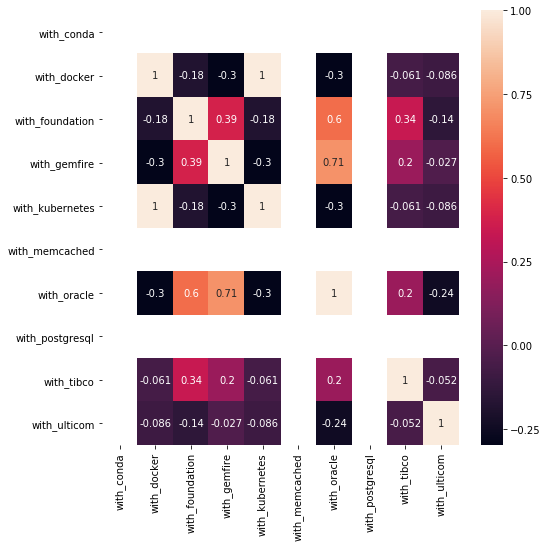

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

optional_software = ['conda', 'docker', 'foundation', 'gemfire', 'kubernetes', 'memcached', 'oracle', 'postgresql', 'tibco', 'ulticom']
software_indicators = data[['with_{}'.format(x) for x in optional_software]]
corr = software_indicators.corr()

_, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot = True, ax = ax);

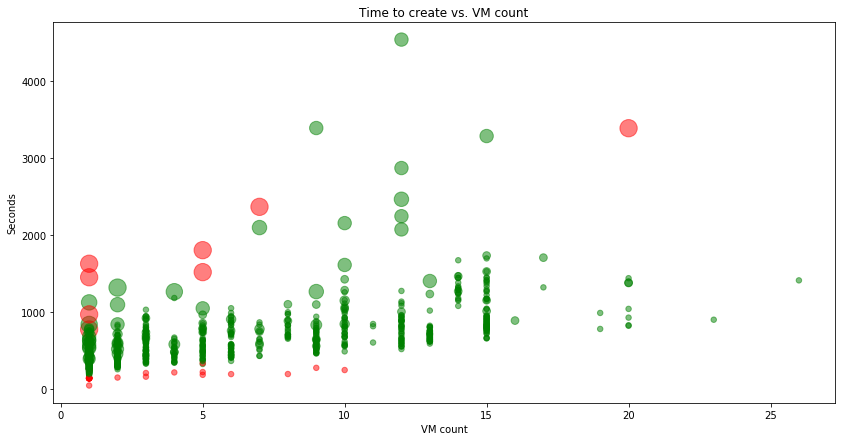

In [6]:
vs.plot1(data)

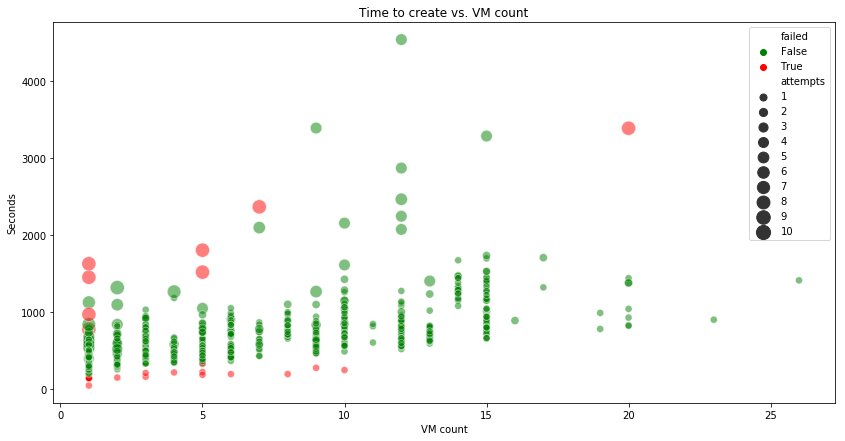

In [7]:
vs.plot3(data)


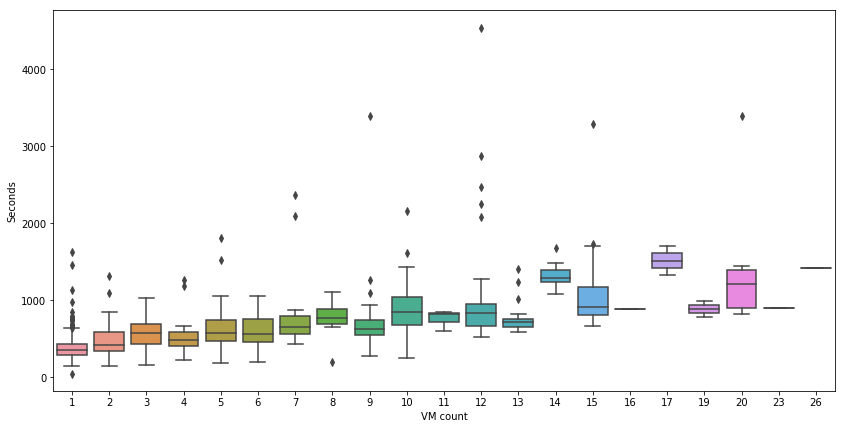

In [8]:
vs.plot2(data)

In [9]:
bad_data = data[(data.attempts > 5) | (data.failed)]
# bad_data = data[(data.failed)]

bad_data_count = bad_data.shape[0]
bad_data_percent = round(bad_data_count * 100 / data.shape[0], 2)
print("Found {} bad data points, {}% of the whole dataset".format(bad_data_count, bad_data_percent))
display(bad_data[['cluster_name', 'attempts', 'failed', 'vm_count', 'seconds']].head(10))

Found 60 bad data points, 5.48% of the whole dataset


,cluster_name,attempts,failed,vm_count,seconds
6,maximo.20181130172742,1,True,4,220.334
25,sdmitry.20190114185031,6,False,12,2076.067
29,marsels.20181128142358,1,True,5,225.501
35,marsels.20181204093910,10,True,1,1455.075
44,sdmitry.20190114185047,6,False,12,2872.506
70,edrojdina.20181206140532,1,True,1,144.247
71,nikolayk.20181225093155,10,True,1,1631.033
88,abondar.20190204124856,6,False,10,1614.971
135,marsels.20181128202554,10,True,5,1521.896
143,maximo.20190109104914,8,False,1,1129.215


We have 1035 good data points now, 94.52% of the original dataset


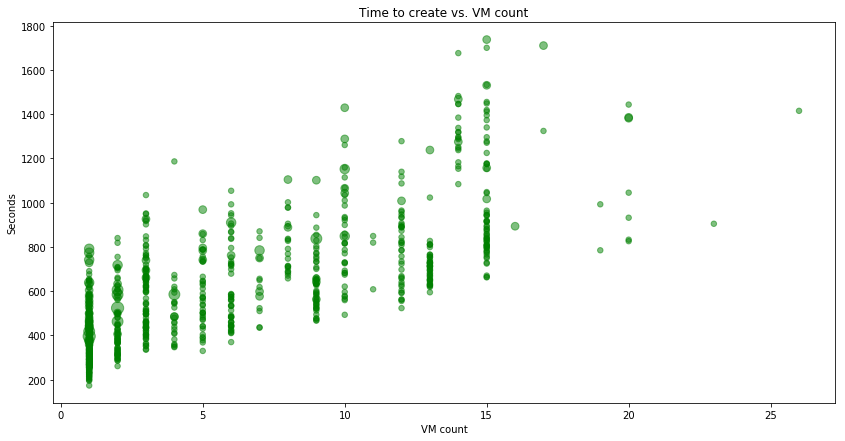

In [10]:
good_data = data.drop(bad_data.index)
good_data_count = good_data.shape[0]
good_data_percent = round(good_data_count * 100 / data.shape[0], 2)
print("We have {} good data points now, {}% of the original dataset".format(good_data_count, good_data_percent))
vs.plot1(good_data)

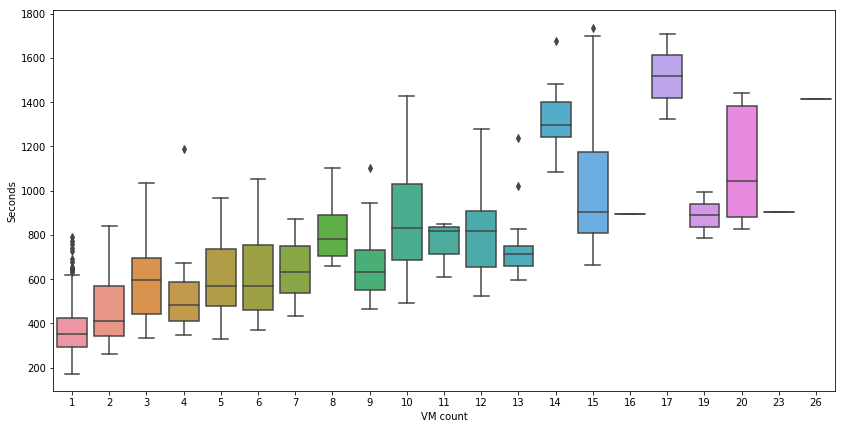

In [11]:
vs.plot2(good_data)

In [12]:
software = ['conda', 'docker', 'foundation', 'gemfire', 'kubernetes', 'memcached', 'oracle', 'postgresql', 'tibco', 'ulticom']

# df = good_data.copy()
# for item in software:
#     ind_col = "with_{}".format(item)
#     ver_col = "with_{}_version".format(item)
#     df.loc[df[ind_col] == False, ver_col] = '0'
#     df = df.drop(columns=ind_col)

df = good_data.copy()
for item in software:
    ind_col = "with_{}".format(item)
    ver_col = "with_{}_version".format(item)
#     df.loc[df[ind_col] == False, ver_col] = '0'
    df = df.drop(columns=ver_col)
    

# df['project'] = df['build_name'].str[16:]
df = df.drop(columns=['cluster_name', 'attempts', 'failed', 'completed', 'build_name'])
display(df.head(10))


,vm_count,with_conda,with_docker,with_flavor,with_foundation,with_gemfire,with_image,with_java_version,with_kubernetes,with_memcached,with_oracle,with_os_version,with_postgresql,with_tibco,with_ulticom,seconds
0,13,False,False,testfarm-flavor-2-16-21,False,False,_default_,1.7.0_51,False,False,False,rhel7.3,False,False,False,650.669
1,1,False,False,testfarm-flavor-2-16-21,False,True,_default_,1.8.0_131,False,False,True,rhel7.4,False,False,False,351.126
2,14,False,False,testfarm-flavor-2-16-21,False,True,_default_,1.8.0_152,False,False,False,rhel7.4,False,False,True,1275.126
3,9,False,False,testfarm-flavor-2-16-21,True,True,_default_,1.8.0_152,False,False,True,rhel7.4,False,False,False,802.617
4,4,False,False,testfarm-flavor-2-16-21,False,True,_default_,1.7.0_51,False,False,True,rhel7.3,False,False,False,459.545
5,13,False,False,testfarm-flavor-2-16-21,False,False,_default_,1.7.0_51,False,False,False,rhel7.3,False,False,False,594.720
7,3,False,False,testfarm-flavor-2-16-21,True,True,_default_,1.7.0_51,False,False,True,rhel7.3,False,False,False,360.446
8,1,False,False,testfarm-flavor-2-16-21,True,False,_default_,1.8.0_74,False,False,True,rhel7.3,False,False,False,404.290
9,15,False,False,testfarm-flavor-2-16-21,False,False,_default_,1.8.0_121,False,False,False,rhel7.4,False,False,False,1016.868
10,2,False,False,testfarm-flavor-2-16-21,False,False,_default_,1.8.0_74,False,False,False,rhel7.3,False,False,False,285.922


In [13]:
# df = df[(df['vm_count'] > 2)]
y = df['seconds']
X = df.drop(columns='seconds')

# one-hot encode categorical features
X = pd.get_dummies(X)
display(X.columns.values)
display(X.head(10))


array(['vm_count', 'with_conda', 'with_docker', 'with_foundation',
       'with_gemfire', 'with_kubernetes', 'with_memcached', 'with_oracle',
       'with_postgresql', 'with_tibco', 'with_ulticom',
       'with_flavor_testfarm-flavor-2-16-21', 'with_image__default_',
       'with_java_version_1.7.0_51', 'with_java_version_1.8.0_121',
       'with_java_version_1.8.0_131', 'with_java_version_1.8.0_152',
       'with_java_version_1.8.0_74', 'with_os_version_rhel6.9',
       'with_os_version_rhel7.3', 'with_os_version_rhel7.4'], dtype=object)

,vm_count,with_conda,with_docker,with_foundation,with_gemfire,with_kubernetes,with_memcached,with_oracle,with_postgresql,with_tibco,...,with_flavor_testfarm-flavor-2-16-21,with_image__default_,with_java_version_1.7.0_51,with_java_version_1.8.0_121,with_java_version_1.8.0_131,with_java_version_1.8.0_152,with_java_version_1.8.0_74,with_os_version_rhel6.9,with_os_version_rhel7.3,with_os_version_rhel7.4
0,13,False,False,False,False,False,False,False,False,False,...,1,1,1,0,0,0,0,0,1,0
2,14,False,False,False,True,False,False,False,False,False,...,1,1,0,0,0,1,0,0,0,1
3,9,False,False,True,True,False,False,True,False,False,...,1,1,0,0,0,1,0,0,0,1
4,4,False,False,False,True,False,False,True,False,False,...,1,1,1,0,0,0,0,0,1,0
5,13,False,False,False,False,False,False,False,False,False,...,1,1,1,0,0,0,0,0,1,0
7,3,False,False,True,True,False,False,True,False,False,...,1,1,1,0,0,0,0,0,1,0
9,15,False,False,False,False,False,False,False,False,False,...,1,1,0,1,0,0,0,0,0,1
13,10,False,False,False,False,False,False,False,False,False,...,1,1,1,0,0,0,0,0,1,0
14,15,False,False,False,False,False,False,False,False,False,...,1,1,0,1,0,0,0,0,0,1
16,15,False,False,False,False,False,False,False,False,False,...,1,1,0,1,0,0,0,0,0,1


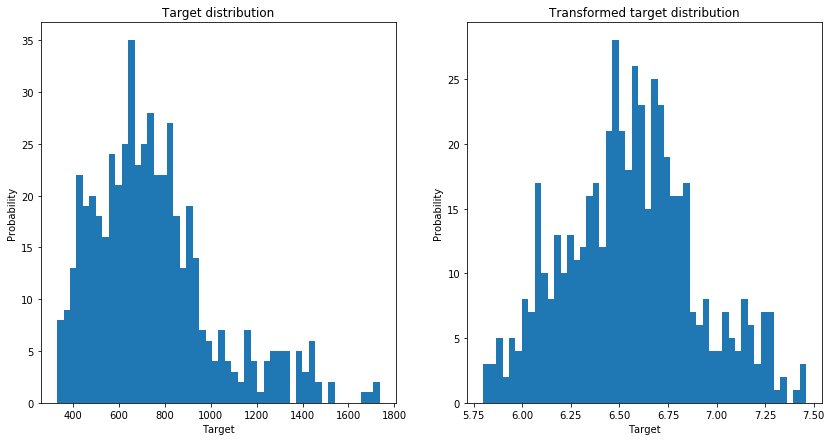

In [14]:
from sklearn.preprocessing import quantile_transform
y_trans = np.log(y)
# y_trans = quantile_transform(pd.DataFrame(y), output_distribution='normal')

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(14,7))

ax0.hist(y, bins=50)
# ax0.set_xlim([0, 2000])
ax0.set_ylabel('Probability')
ax0.set_xlabel('Target')
ax0.set_title('Target distribution')

ax1.hist(y_trans, bins=50)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Target')
ax1.set_title('Transformed target distribution');


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

def root_mean_squared_error(y_true, y_pred):
    from sklearn.metrics import mean_squared_error
    return np.sqrt(mean_squared_error(y_true, y_pred))

def scores_str(y_true, y_pred):
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_log_error
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return "R^2 = {:.4f}, MAE = {:.4f}, RMSE = {:.4f}, RMSLE = {:.4f}".format(r2, mae, rmse, rmsle)


In [16]:
class BenchmarkModel():
    def __init__(self, feat='vm_count', avg='mean'):
        self.feat = feat
        self.avg = avg 

    def fit(self, X, y):
        df = pd.concat([X, pd.Series(y, name='y')], axis=1)
        groupby = df['y'].groupby(df[self.feat])
        if self.avg == 'mean':
            avg = pd.DataFrame(groupby.mean())
        elif self.avg == 'median':
            avg = pd.DataFrame(groupby.median())
        
        ## we may not get target data for some values of feat, 
        ## so let's interpolate them
        avg = avg.reindex(pd.Index(range(1,27), name=self.feat))
        avg = avg.interpolate()
        
        self.avg = avg
        return self
    
    def predict(self, X):
        df = pd.merge(X, self.avg, on=self.feat, how='left')
        return df['y']

    def score(self, X, y):
        from sklearn.metrics import r2_score
        return r2_score(y, self.predict(X))


from sklearn.metrics import r2_score, mean_absolute_error
for avg in ['mean', 'median']:
    bm = BenchmarkModel(avg = avg).fit(X_train, y_train)
    y_pred = bm.predict(X_test)
    scores = scores_str(y_test, y_pred)
    print("Benchmark by {}: {}".format(avg, scores))



Benchmark by mean: R^2 = 0.3222, MAE = 149.7753, RMSE = 181.9478, RMSLE = 0.2457
Benchmark by median: R^2 = 0.3327, MAE = 143.7892, RMSE = 180.5317, RMSLE = 0.2423


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, RANSACRegressor, HuberRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor

regressors = [
    DecisionTreeRegressor(),
    LinearRegression(),
    RidgeCV(),
    RANSACRegressor(), 
    HuberRegressor(),
    AdaBoostRegressor(), 
    RandomForestRegressor(), 
    GradientBoostingRegressor(),
]

for reg in regressors:
    name = type(reg).__name__
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    scores = scores_str(y_test, y_pred)
    print("{:25} : {}".format(name, scores))


DecisionTreeRegressor     : R^2 = 0.6945, MAE = 96.6553, RMSE = 122.1643, RMSLE = 0.1647
LinearRegression          : R^2 = 0.6619, MAE = 101.0973, RMSE = 128.5134, RMSLE = 0.1713
RidgeCV                   : R^2 = 0.6601, MAE = 101.8409, RMSE = 128.8416, RMSLE = 0.1719
RANSACRegressor           : R^2 = 0.6331, MAE = 102.4840, RMSE = 133.8731, RMSLE = 0.1752
HuberRegressor            : R^2 = 0.6520, MAE = 100.9786, RMSE = 130.3732, RMSLE = 0.1721
AdaBoostRegressor         : R^2 = 0.5622, MAE = 122.3466, RMSE = 146.2358, RMSLE = 0.2106
RandomForestRegressor     : R^2 = 0.6983, MAE = 94.8836, RMSE = 121.3846, RMSLE = 0.1646
GradientBoostingRegressor : R^2 = 0.6909, MAE = 97.7375, RMSE = 122.8765, RMSLE = 0.1626


C:\soft\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [2, 3, 4],
    "n_estimators": [50, 100, 150, 200, 300],
    "learning_rate": [.05, .1, .2, .3],
    "subsample": [.8, .9, 1.0]
    }

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid = param_grid, cv = 3, verbose = 1)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_


Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:   37.2s finished


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.8, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
# reg = GradientBoostingRegressor().fit(X_train, y_train)
reg = grid_search.best_estimator_
y_pred = reg.predict(X_test)

name = 'Optimized GradientBoostingRegressor'
scores = scores_str(y_test, y_pred)
print("{:25} : {}".format(name, scores))

importance = pd.DataFrame({'feature': X_test.columns, 'importance': reg.feature_importances_})
importance.sort_values(by='importance', ascending=False, inplace=True)
display(importance.head(15))

Optimized GradientBoostingRegressor : R^2 = 0.6728, MAE = 100.4527, RMSE = 126.4211, RMSLE = 0.1668


,feature,importance
0,vm_count,0.624413
10,with_ulticom,0.119037
5,with_kubernetes,0.092530
2,with_docker,0.042342
9,with_tibco,0.029715
16,with_java_version_1.8.0_152,0.022664
13,with_java_version_1.7.0_51,0.020741
4,with_gemfire,0.016144
14,with_java_version_1.8.0_121,0.012376
7,with_oracle,0.007112


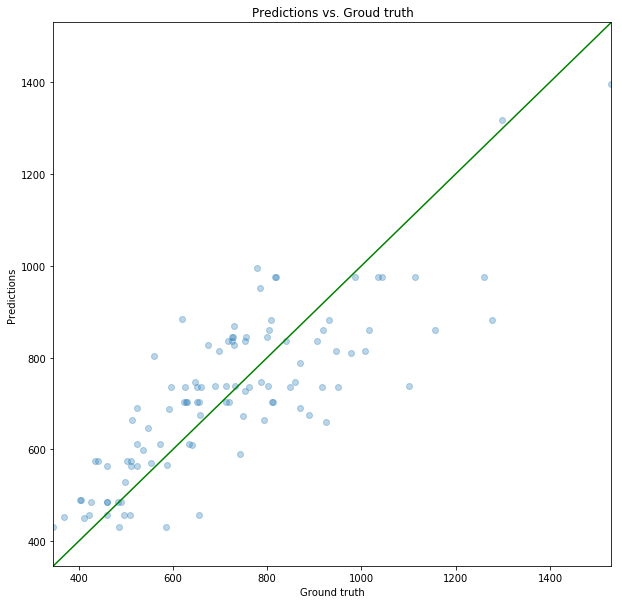

In [20]:
import numpy as np
plt.figure(figsize=(10,10))
plt.title("Predictions vs. Groud truth")
plt.xlabel("Ground truth")
plt.ylabel("Predictions")
plt.scatter(x=y_test, y=y_pred, marker='o', alpha=.3)

min_lim = min(y_test.min(), y_pred.min())
max_lim = max(y_test.max(), y_pred.max())
plt.plot([min_lim, max_lim], [min_lim, max_lim], color = 'green')
plt.xlim(min_lim, max_lim), plt.ylim(min_lim, max_lim)
plt.show()


In [21]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
reg = TransformedTargetRegressor(
    regressor=GradientBoostingRegressor(),
#     transformer=QuantileTransformer(output_distribution='normal')
    func=np.log, inverse_func=np.exp
)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

name = 'TransformedTargetRegressor'
scores = scores_str(y_test, y_pred)
print("{:25} : {}".format(name, scores))


TransformedTargetRegressor : R^2 = 0.6905, MAE = 96.5845, RMSE = 122.9613, RMSLE = 0.1621
